In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


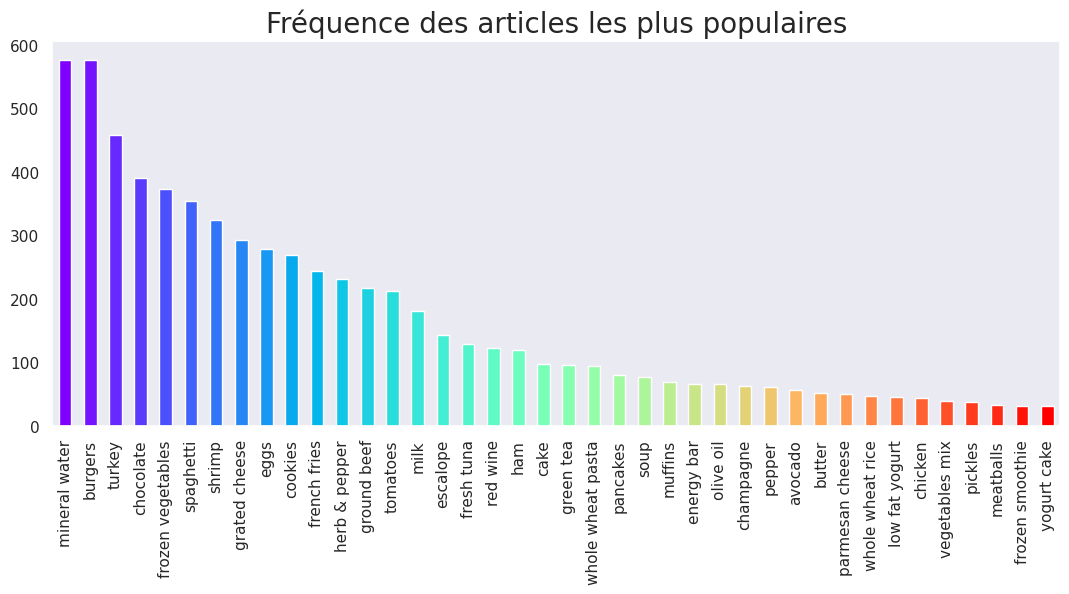

In [6]:

# setup seaborn && pandas
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

# get data 
data = pd.read_csv('./market_basket_opti.csv', header = None)

# EDA
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('Fréquence des articles les plus populaires', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()


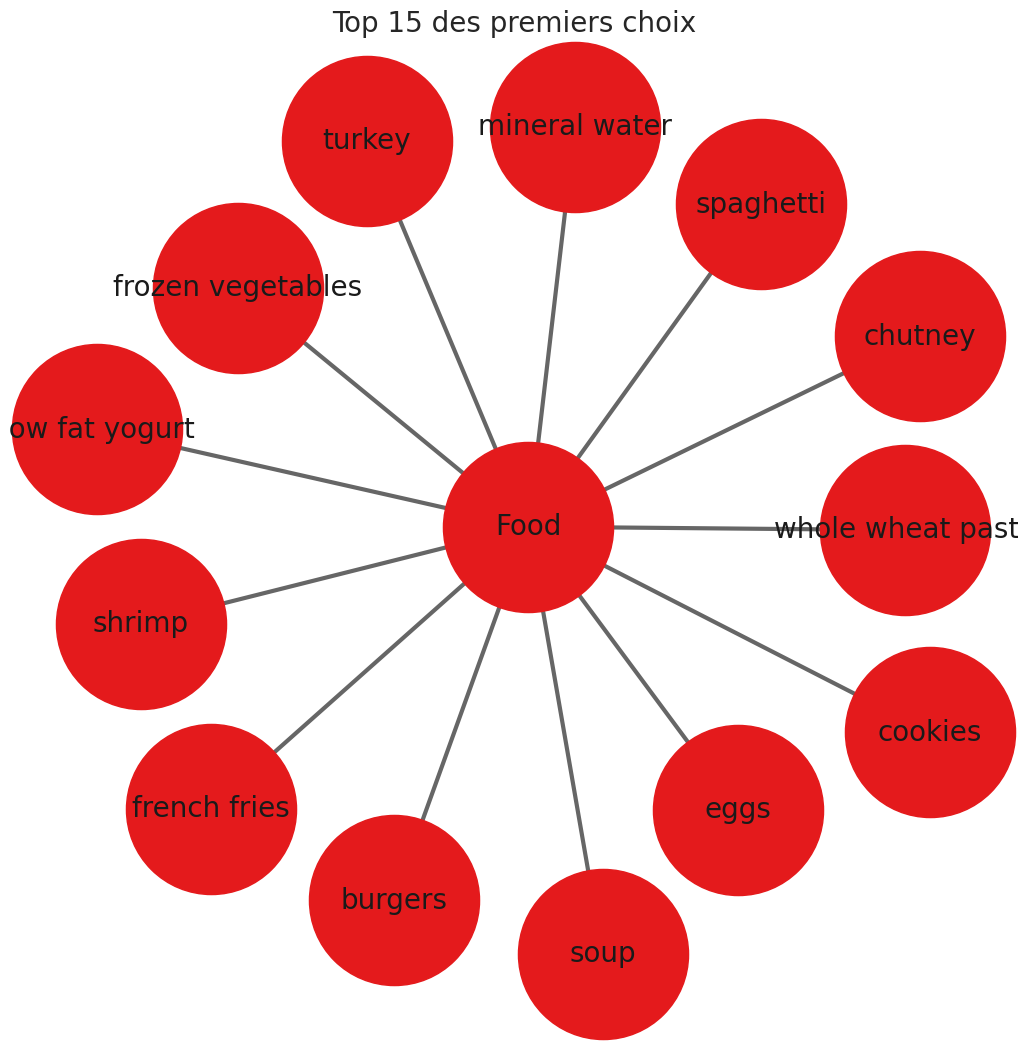

In [7]:

import networkx as nx
import warnings

warnings.filterwarnings('ignore')

data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))

nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')

plt.axis('off')
plt.grid()
plt.title('Top 15 des premiers choix', fontsize = 20)
plt.show()



In [ ]:

# get transactions from dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])
    
    
from itertools import permutations

# extract unique items
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

# remove nan items
if 'nan' in items: items.remove('nan')

# compute rules
rules = list(permutations(items, 2))

print(rules)
